In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from __future__ import print_function
import numpy as np
import os
import glob
import json
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
datadir = "../filters/GMOS"
file_ = "GMOS-S_filters_for_RAMSESII.xlsx"

In [4]:
#df = pd.read_excel(os.path.join(datadir, file_), sheetname="sheet_name")
xls = pd.ExcelFile(os.path.join(datadir, file_))


Seeing the name of the sheets

In [5]:

xls.sheet_names

['RAMSESII', 'OVI and OVIC']

In [21]:
df1 = pd.read_excel(xls, 'RAMSESII')
df2 = pd.read_excel(xls, 'OVI and OVIC')
df1 = df1.iloc[1:]
df2 = df2.iloc[1:]
df2

,6835Afilter GMOS N,Unnamed: 1,6780A filter GMOS N,Unnamed: 3,sample3,Unnamed: 5,GMOS-S 6835A no2 B004,Unnamed: 7,GMOS-S 6780A no2 B006,Unnamed: 9
1,1200,6.9673,1200,44.628,1200,5.6146,1200,5.6471,1200,41.447
2,1199.8,6.7092,1199.8,45.167,1199.8,5.4271,1199.8,5.4615,1199.8,41.809
3,1199.6,6.4181,1199.6,45.714,1199.6,5.2161,1199.6,5.2542,1199.6,42.112
4,1199.4,6.1827,1199.4,46.284,1199.4,5.0595,1199.4,5.0796,1199.4,42.481
5,1199.2,6.0118,1199.2,46.866,1199.2,4.9187,1199.2,4.9687,1199.2,42.852
6,1199,5.7766,1199,47.427,1199,4.7584,1199,4.7864,1199,43.207
7,1198.8,5.5674,1198.8,48.041,1198.8,4.6057,1198.8,4.6313,1198.8,43.594
8,1198.6,5.3723,1198.6,48.755,1198.6,4.4393,1198.6,4.4711,1198.6,44.071
9,1198.4,5.1913,1198.4,49.367,1198.4,4.2873,1198.4,4.3416,1198.4,44.5
10,1198.2,5.0208,1198.2,50.047,1198.2,4.1747,1198.2,4.2063,1198.2,44.927


In [7]:
#RAMSES II
wl_r =df1["r_G0326"]
T_r =df1["Unnamed: 11"]
wl_i =df1["i_G0327"]
T_i =df1["Unnamed: 13"]
wl_ha=df1["Ha_G0336"]
T_ha =df1["Unnamed: 15"] 
wl_haC=df1["HaC_G0337"]
T_haC =df1["Unnamed: 17"]
wl_He=df1["HeII_G0340"]
T_He =df1["Unnamed: 19"] 
wl_HeC=df1["HeIIC_G0341"]
T_HeC =df1["Unnamed: 21"]

In [8]:
#OVI and OVIC
wl_OVI=df2["GMOS-S 6835A no2 B004"]
T_OVI =df2["Unnamed: 7"] 
wl_OVIC=df2["GMOS-S 6780A no2 B006"]
T_OVIC =df2["Unnamed: 9"] 

In [9]:
def asciifile(Namefile, wll, ress):
    file=open(os.path.join(datadir, Namefile),'w') #create file  
    for x,y in sorted(zip(wll, ress)):
        file.write('%f  %f\n'%(x,y))     #assume you separate columns by tabs
    file.close()

In [10]:
asciifile("r_G0326.dat", wl_r, T_r)
asciifile("i_G0327.dat", wl_i, T_i)
asciifile("Ha_G0336.dat", wl_ha, T_ha)
asciifile("HaC_G0337.dat", wl_haC, T_haC)
asciifile("HeII_G0340.dat", wl_He, T_He)
asciifile("HeIIC_G0341.dat", wl_HeC, T_HeC)
asciifile("GMOS-S_6835A_B004.dat", wl_OVI, T_OVI)
asciifile("GMOS-S_6780A_B006.dat", wl_OVIC, T_OVIC)

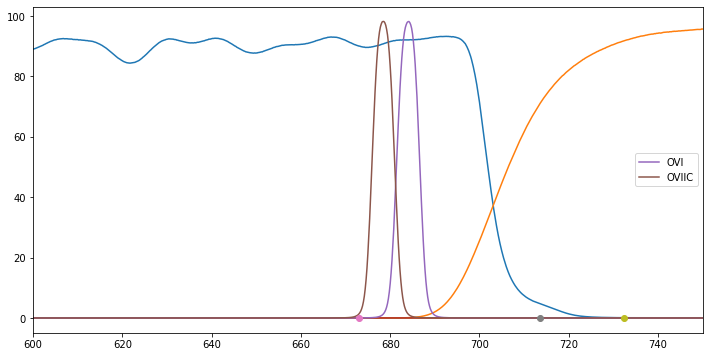

In [20]:
plt.xlim(600, 750)
plt.plot(wl_r, T_r)
plt.plot(wl_i, T_i)
plt.plot(wl_He, T_He)
plt.plot(wl_HeC, T_He)
#plt.plot(wl_ha, T_ha)
#plt.plot(wl_haC, T_haC)
plt.plot(wl_OVI, T_OVI, label="OVI")
plt.plot(wl_OVIC, T_OVIC, label="OVIIC")
plt.plot(673.1, 0, "o")
plt.plot(713.5, 0, "o")
plt.plot(732.3, 0, "o")
plt.legend()
gcf().set_size_inches(12,6)

In [12]:
datadir1 = "../symbiotic-IPHAS-spectros"
file_1 = "S18290608_0034572.dat"
datadir2 = "../syst-spectros"
file_2 = "SMC1.txt"
file_3 = "Sanduleak.txt"

In [13]:
x1 = np.loadtxt(os.path.join(datadir1, file_1), delimiter = None, skiprows = 0, usecols = None, 
               unpack = False, dtype = np.dtype([('Wl', '|f8'), ('Flux', 'f8')]))
x2 = np.loadtxt(os.path.join(datadir2, file_2), delimiter = None, skiprows = 0, usecols = None, 
               unpack = False, dtype = np.dtype([('Wl', '|f8'), ('Flux', 'f8')]))
x3 = np.loadtxt(os.path.join(datadir2, file_3), delimiter = None, skiprows = 0, usecols = None, 
               unpack = False, dtype = np.dtype([('Wl', '|f8'), ('Flux', 'f8')]))

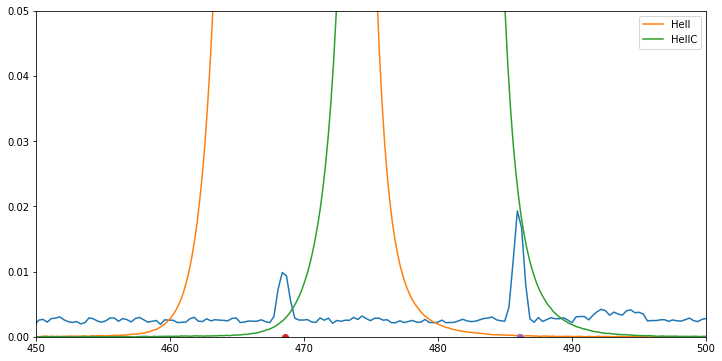

In [14]:
plt.xlim(450, 500)
plt.ylim(0, 0.05)
plt.plot(x1["Wl"]/10, x1["Flux"]*6.8**17)
plt.plot(wl_He, T_He/100, label="HeII")
plt.plot(wl_HeC, T_HeC/100, label="HeIIC")
plt.plot(468.6, 0, "o")
plt.plot(486.1, 0, "o")
plt.legend()
plt.savefig("S18290608_0034572-GMOS.jpg")
gcf().set_size_inches(12,6)

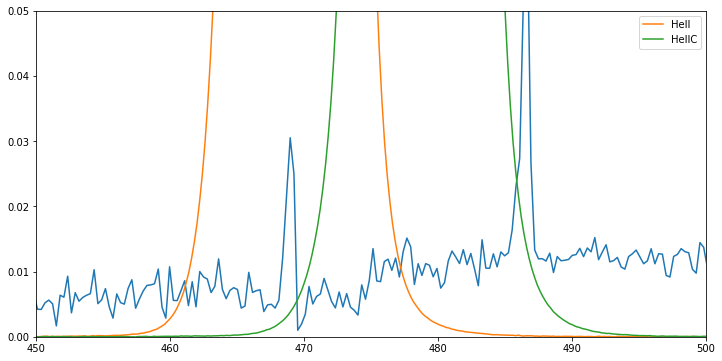

In [15]:
plt.xlim(450, 500)
plt.ylim(0, 0.05)
plt.plot(x2["Wl"]/10, x2["Flux"]*6.8**16)
plt.plot(wl_He, T_He/100, label="HeII")
plt.plot(wl_HeC, T_HeC/100, label="HeIIC")
plt.legend()
plt.savefig("SMC1-GMOS.jpg")
gcf().set_size_inches(12,6)

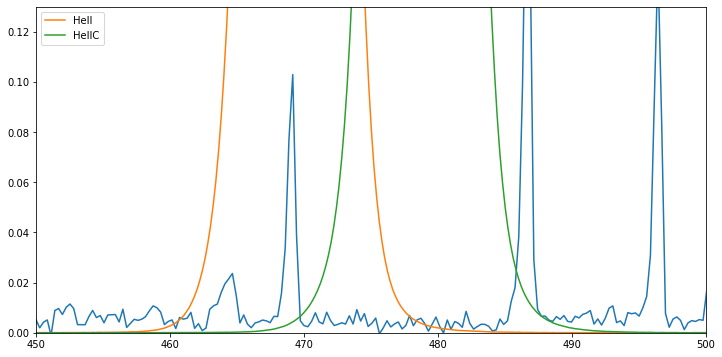

In [16]:
plt.xlim(450, 500)
plt.ylim(0, 0.13)
plt.plot(x3["Wl"]/10, x3["Flux"]*6.8**16)
plt.plot(wl_He, T_He/100, label="HeII")
plt.plot(wl_HeC, T_HeC/100, label="HeIIC")
plt.legend()
plt.savefig("Sanduleak-GMOS.jpg")
gcf().set_size_inches(12,6)

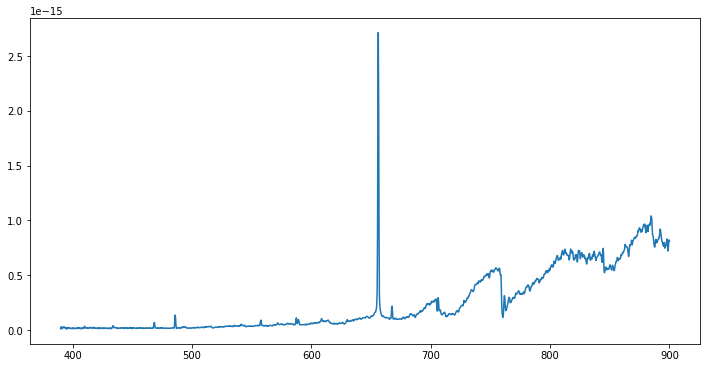

In [17]:

plt.plot(x1["Wl"]/10, x1["Flux"])
plt.savefig("S18290608_0034572.jpg")
gcf().set_size_inches(12,6)